In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../..')
import gp2
from gp2 import Runner 
from keras import losses, metrics
from tensorflow.keras import optimizers

-----------------------------------------
keras-unet init: TF version is >= 2.0.0 - using `tf.keras` instead of `Keras`
-----------------------------------------


In [3]:
R = Runner(classifier='kunet',
           discriminator='cnn',
           activation='relu',
           use_batch_norm=True,
           upsample_mode='deconv',
           dropout=0.3,
           dropout_change_per_layer=0.0,
           dropout_type='spatial',
           use_dropout_on_upsampling=False,
           use_attention=False,
           filters=16,
           num_layers=4,
           output_activation='sigmoid',
           optimizer=None,
           loss=None,
           metric=None,
           verbose=False
          )

*** GP2 KUnet ***
Working directory: /tmp/tmpguqbij1wGP2
Using default discriminator (CNN)


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')
# images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_images.npy')
# masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_normalized_masks.npy')

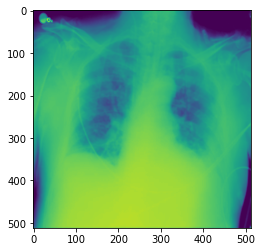

In [5]:
imshow(images[0])

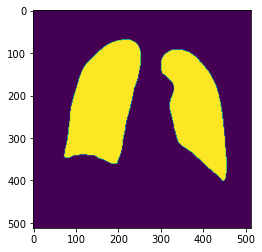

In [6]:
imshow(masks[0])

In [7]:
images.shape

(3616, 512, 512, 1)

In [8]:
masks.shape

(3616, 512, 512, 1)

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
R.run(images=images, masks=masks, weights=weights, runs=7)

Weights OK!
******
Loop 1
Epoch 1/100
3/3 [==============================] - 20s 5s/step - loss: 0.8990 - dice_coeff: 0.3565 - val_loss: 5.0226 - val_dice_coeff: 0.4401
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 0.8729 - dice_coeff: 0.3621 - val_loss: 3.1859 - val_dice_coeff: 0.4272
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.8435 - dice_coeff: 0.3788 - val_loss: 2.3119 - val_dice_coeff: 0.4131
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.8084 - dice_coeff: 0.3936 - val_loss: 1.8193 - val_dice_coeff: 0.4011
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.7972 - dice_coeff: 0.3983 - val_loss: 1.4976 - val_dice_coeff: 0.3908
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.7710 - dice_coeff: 0.4069 - val_loss: 1.2715 - val_dice_coeff: 0.3820
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.7456 - dice_coeff: 0.4173 - val_loss: 1.1197 - va

In [11]:
R.classifier_scores

[[0.3855453431606293, 0.5226294994354248],
 [0.3195123076438904, 0.5805039405822754],
 [0.2626659572124481, 0.6541255712509155],
 [0.23141518235206604, 0.7224111557006836],
 [0.17635661363601685, 0.7773696184158325],
 [0.15863294899463654, 0.8008214831352234],
 [0.15614986419677734, 0.8016497492790222]]

In [12]:
R.discriminator_scores

[[0.7877331376075745, 0.9722222089767456],
 [3.575770616531372, 0.9305555820465088],
 [11.705462455749512, 0.7685185074806213],
 [15.74838924407959, 0.7129629850387573],
 [16.775007247924805, 0.6527777910232544],
 [16.6944522857666, 0.6620370149612427],
 [19.86441421508789, 0.6018518805503845]]

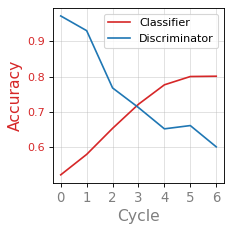

In [13]:
R.plot() 